# Introduction

In this work, we are going to apply different deep learning techniques for classification problem of CIFAR10 

# Data excraction and Data preparation

In [1]:
import torch
import torch.nn as nn
import torch.utils.data
import torchvision.transforms as transforms
import torchvision
import os
PATH = 'the directory'
os.chdir(PATH)

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(), transforms.Normalize((0.4914,0.48216,0.44653),
                                               (0.24703,0.24349, 0.26159))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                        download=True, transform = transform)
testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                        download=True, transform = transform)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle = True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle = True, num_workers=2)

# Fully connected network

In [5]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):    
    	# Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):    
    	# Do the forward pass
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
model = Net()

In [6]:
# Instantiate the Adam optimizer and Cross-Entropy loss function
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()
for epoch in range(2):
    running_loss = 0.0
    for batch_idx, data in enumerate(trainloader,0):
        inputs, labels = data
        inputs = inputs.view(-1, 32 * 32*3)
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels )
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.821
[1,  4000] loss: 1.631
[1,  6000] loss: 1.573
[2,  2000] loss: 1.474
[2,  4000] loss: 1.490
[2,  6000] loss: 1.464
Finished Training


In [7]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images.view(-1, 32*32*3)
        outputs = model(images)
        _,predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the  train images: %d %%' % (
    100 * correct / total))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(-1, 32 * 32*3)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  train images: 51 %
Accuracy of the network on the 10000 test images: 47 %


we can say, there is no overfit signs, however, despite the fact that we have 10 classes 49% accuracy is relativley low, lets try a more complex fully connected net

In [8]:
import torch.nn.functional as F
class Net_deep(nn.Module):
    def __init__(self):
        super(Net_deep, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200,10)

    def forward(self, x):    
    	# Do the forward pass
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return x
model = Net_deep()
model.train()

Net_deep(
  (fc1): Linear(in_features=3072, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)

In [9]:
# Instantiate the Adam optimizer and Cross-Entropy loss function
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()
for epoch in range(2):
    running_loss = 0.0
    for batch_idx, data in enumerate(trainloader,0):
        inputs, labels = data
        inputs = inputs.view(-1, 32 * 32*3)
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels )
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.807
[1,  4000] loss: 1.633
[1,  6000] loss: 1.582
[2,  2000] loss: 1.484
[2,  4000] loss: 1.481
[2,  6000] loss: 1.462
Finished Training


In [10]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images.view(-1, 32*32*3)
        outputs = model(images)
        _,predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the  train images: %d %%' % (
    100 * correct / total))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(-1, 32 * 32*3)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  train images: 51 %
Accuracy of the network on the 10000 test images: 48 %


clearly, we have no imporve in making deeper network, let's consider another type of network - convolutional

# Convolutional network

In [11]:
class conv_net(nn.Module):
    def __init__(self):
        super(conv_net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(in_features=128*4*4, out_features=10)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x= x.view(-1, 128*4*4)
        x = F.relu(self.fc1(x))
        return x

In [12]:
model = conv_net()
model.train()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 3e-4)

In [13]:
for epoch in range(2):
    running_loss = 0.0
    for batch_idx, data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.131
[1,  4000] loss: 1.977
[1,  6000] loss: 1.907
[2,  2000] loss: 1.844
[2,  4000] loss: 1.818
[2,  6000] loss: 1.785
Finished Training


Clearly, our model is stacking, it can be caused by low number of fully connected layers, 
lets add some fully connected layers at the end of the net

In [14]:
class conv_net(nn.Module):
    def __init__(self):
        super(conv_net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(in_features=128*4*4, out_features=200) # we are using the similar 
        self.fc2 = nn.Linear(in_features=200, out_features=100)# architecture as our 
        self.fc3 = nn.Linear(in_features=100, out_features=10)#fully connected network
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x= x.view(-1, 128*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
model = conv_net()
model.train()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 3e-4)
for epoch in range(2):
    running_loss = 0.0
    for batch_idx, data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.681
[1,  4000] loss: 1.308
[1,  6000] loss: 1.147
[2,  2000] loss: 0.982
[2,  4000] loss: 0.936
[2,  6000] loss: 0.883
Finished Training


In [16]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = model(images)
        _,predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the  train images: %d %%' % (
    100 * correct / total))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  train images: 72 %
Accuracy of the network on the 10000 test images: 69 %


There are some opportunities in decreasing number of epochs, lets increase number of epochs till 10

In [19]:
model = conv_net()
model.train()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 3e-4)
for epoch in range(10):
    running_loss = 0.0
    for batch_idx, data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.653
[1,  4000] loss: 1.299
[1,  6000] loss: 1.132
[2,  2000] loss: 0.978
[2,  4000] loss: 0.908
[2,  6000] loss: 0.869
[3,  2000] loss: 0.762
[3,  4000] loss: 0.717
[3,  6000] loss: 0.718
[4,  2000] loss: 0.601
[4,  4000] loss: 0.610
[4,  6000] loss: 0.612
[5,  2000] loss: 0.492
[5,  4000] loss: 0.507
[5,  6000] loss: 0.518
[6,  2000] loss: 0.385
[6,  4000] loss: 0.430
[6,  6000] loss: 0.433
[7,  2000] loss: 0.312
[7,  4000] loss: 0.332
[7,  6000] loss: 0.363
[8,  2000] loss: 0.249
[8,  4000] loss: 0.271
[8,  6000] loss: 0.288
[9,  2000] loss: 0.187
[9,  4000] loss: 0.227
[9,  6000] loss: 0.232
[10,  2000] loss: 0.147
[10,  4000] loss: 0.182
[10,  6000] loss: 0.190
Finished Training


In [20]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = model(images)
        _,predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the  train images: %d %%' % (
    100 * correct / total))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  train images: 96 %
Accuracy of the network on the 10000 test images: 74 %


# Advanced model with regularisation technique

One problem with complex architecture is the forward function becomes long and complicated, to solve this problem we are going to use Sequential model, grouping logically connected layers into one part, additionally we will use Batchnormalization and dropout technique for regularization.

In [29]:
class conv_net_advanced(nn.Module):
    def __init__(self):
        super(conv_net_advanced, self).__init__()
        self.conv = nn.Sequential(nn.Conv2d(in_channels=3,out_channels=32, kernel_size=3, padding=1),nn.ReLU(inplace = True),
                                  nn.MaxPool2d(2,2),
                                   nn.BatchNorm2d(32),
                                  nn.Conv2d(in_channels=32,out_channels=64, kernel_size=3, padding=1),nn.ReLU(inplace = True),
                                  nn.MaxPool2d(2,2),
                                   nn.BatchNorm2d(64),
                                  nn.Conv2d(in_channels=64,out_channels=128, kernel_size=3, padding=1),nn.ReLU(inplace = True),
                                 nn.MaxPool2d(2,2),
                                  nn.BatchNorm2d(128),)
        self.avg_pool = nn.AdaptiveAvgPool2d((6,6))
        self.fc = nn.Sequential(nn.Linear(in_features=128*6*6, out_features=200),
                                nn.Dropout(0.5),
                               nn.Linear(in_features=200, out_features=100),
                               nn.Linear(in_features=100, out_features=10))
    def forward(self,x):
        x = self.conv(x)
        x = self.avg_pool(x)
        x= x.view(-1, 128*6*6)
        x = self.fc(x)
        return x

In [30]:
model = conv_net_advanced()
model.train()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 3e-4)
for epoch in range(10):
    running_loss = 0.0
    for batch_idx, data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.419
[1,  4000] loss: 1.161
[1,  6000] loss: 1.045
[2,  2000] loss: 0.929
[2,  4000] loss: 0.894
[2,  6000] loss: 0.861
[3,  2000] loss: 0.749
[3,  4000] loss: 0.757
[3,  6000] loss: 0.751
[4,  2000] loss: 0.637
[4,  4000] loss: 0.656
[4,  6000] loss: 0.671
[5,  2000] loss: 0.559
[5,  4000] loss: 0.572
[5,  6000] loss: 0.591
[6,  2000] loss: 0.499
[6,  4000] loss: 0.516
[6,  6000] loss: 0.547
[7,  2000] loss: 0.433
[7,  4000] loss: 0.475
[7,  6000] loss: 0.491
[8,  2000] loss: 0.396
[8,  4000] loss: 0.430
[8,  6000] loss: 0.456
[9,  2000] loss: 0.362
[9,  4000] loss: 0.390
[9,  6000] loss: 0.413
[10,  2000] loss: 0.325
[10,  4000] loss: 0.371
[10,  6000] loss: 0.377
Finished Training


In [31]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = model(images)
        _,predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the  train images: %d %%' % (
    100 * correct / total))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  train images: 92 %
Accuracy of the network on the 10000 test images: 77 %


We can see that applying regularisation we decreased the difference between train and test, and improve the accuracy on the test set

Let's see how our model works with real images and data 

In [32]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


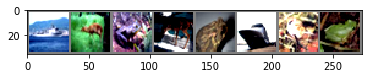

GroundTruth:   ship  deer  frog  deer  frog  ship  bird  frog
Predicted:   ship  deer  frog   cat  frog  bird  frog  frog


In [33]:
dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = model(images)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] 
                                for j in range(8)))
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))
